In [14]:
## Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [15]:
## Step 2: Data Collection
ticker = "AAPL"
data = yf.download(ticker, start="2024-08-01", end="2024-12-16")  # Dec 16 for Dec 15 prediction
data = data[["Open", "High", "Low", "Close", "Volume"]]
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


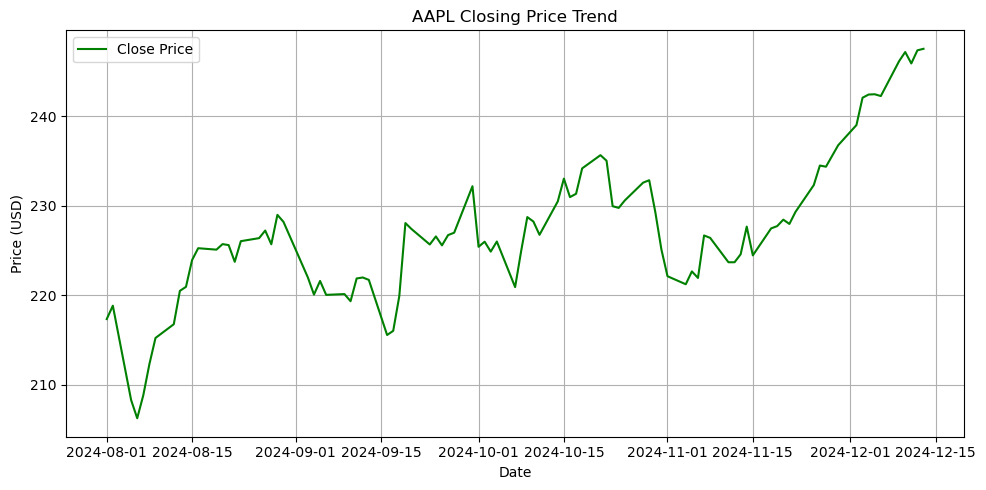

In [16]:
## Step 3: Exploratory Data Analysis
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["Close"], label="Close Price", color='green')
plt.title(f"{ticker} Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import seaborn as sns


In [19]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


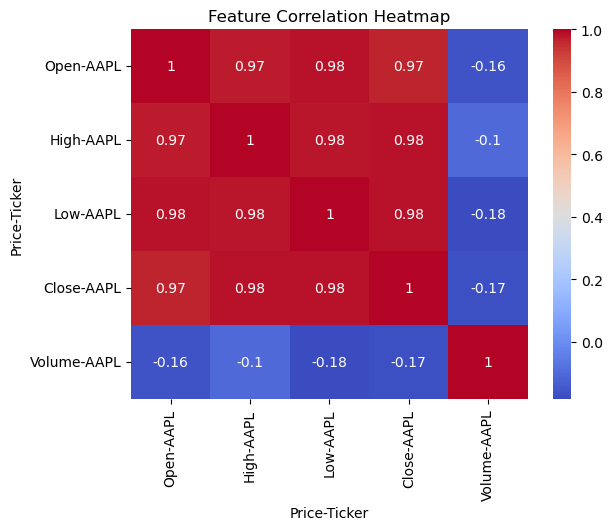

In [20]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
## Step 4: Data Preprocessing
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
features = ["Open", "High", "Low", "Volume"]
target = "Close"

In [22]:
# Normalize features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled[target] = data["Close"].values

In [23]:
train_data = data_scaled[:len(data_scaled)-11]
test_data = data_scaled[-11:]

In [24]:
# Train on August to November
train_data = data_scaled[:len(data_scaled)-11]  # up to Nov 30
X_train = train_data[features]
y_train = train_data[target]

In [25]:
# Predict for Dec 1–15
test_data = data_scaled[-11:]
X_test = test_data[features]
y_test = test_data[target]

In [26]:
## Step 5: Model Training - XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
## Step 4: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [29]:
## Step 5: Model Evaluation
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

In [11]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 8.57
RMSE: 9.23


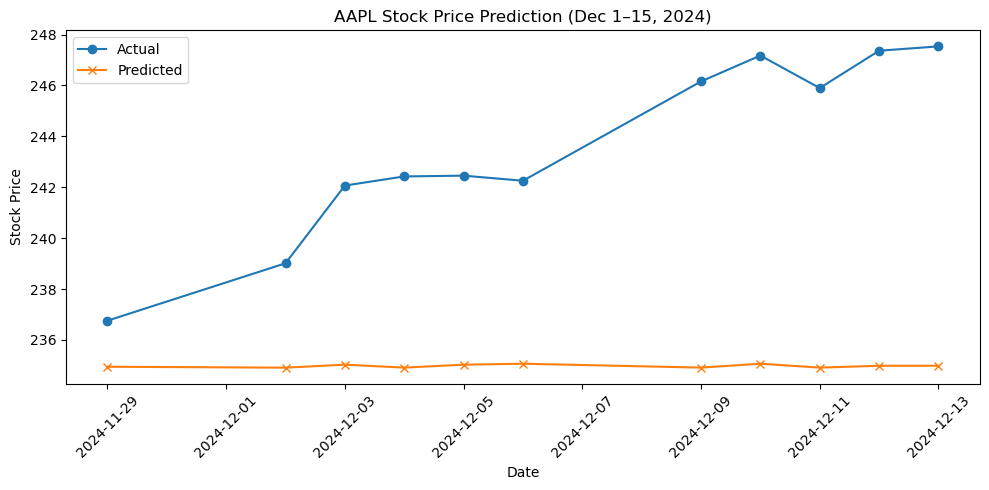

In [12]:
## Step 6: Visualization
plt.figure(figsize=(10,5))
plt.plot(data["Date"][-11:], y_test, label="Actual", marker='o')
plt.plot(data["Date"][-11:], predictions, label="Predicted", marker='x')
plt.title(f"{ticker} Stock Price Prediction (Dec 1–15, 2024)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

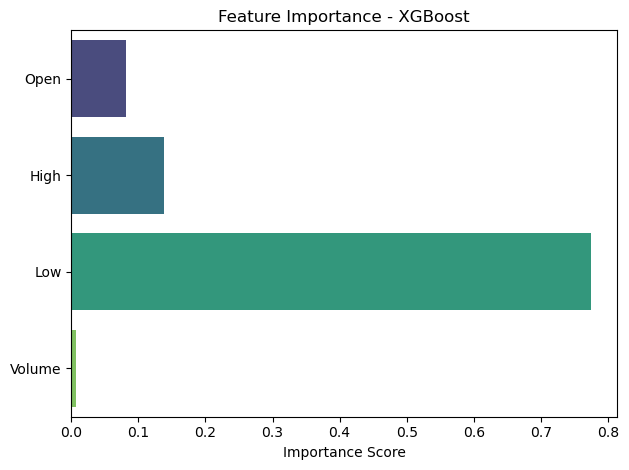

In [30]:
## Step 8: Feature Importance
importances = model.feature_importances_
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [32]:
## Step 7: Summary
summary = pd.DataFrame({
    "Date": data["Date"][-11:].dt.strftime('%Y-%m-%d'),
    "Actual Price": y_test.values,
    "Predicted Price": predictions
})
summary

,Date,Actual Price,Predicted Price
84,2024-11-29,236.758881,234.948770
85,2024-12-02,239.013428,234.913127
86,2024-12-03,242.066071,235.030866
87,2024-12-04,242.425201,234.915005
88,2024-12-05,242.455124,235.029703
89,2024-12-06,242.255600,235.067935
90,2024-12-09,246.156204,234.915005
91,2024-12-10,247.173752,235.067935
92,2024-12-11,245.896820,234.915005
93,2024-12-12,247.363297,234.987571
